In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json

import seaborn as sns
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
pd.set_option('display.max_rows', 144)
from statsbombpy import sb


In [206]:
## read json file "competitions.json"

data = json.load(open("/Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/competitions.json"))


In [207]:
from pandas import json_normalize


df = json_normalize(data, sep = "_")
df.sort_values(by = "season_id", inplace = True)
df

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
38,11,1,Spain,La Liga,male,False,False,2017/2018,2023-07-24T13:03:48.574627,2021-06-13T16:17:31.694,None,2023-07-24T13:03:48.574627
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
39,11,2,Spain,La Liga,male,False,False,2016/2017,2023-11-14T18:26:44.671413,2021-06-13T16:17:31.694,None,2023-11-14T18:26:44.671413
60,49,3,United States of America,NWSL,female,False,False,2018,2023-07-24T13:01:22.094587,2021-06-13T16:17:31.694,None,2023-07-24T13:01:22.094587
27,43,3,International,FIFA World Cup,male,False,True,2018,2023-07-24T13:09:34.513519,2021-06-13T16:17:31.694,None,2023-07-24T13:09:34.513519
24,37,4,England,FA Women's Super League,female,False,False,2018/2019,2023-07-24T19:50:20.881595,2021-06-13T16:17:31.694,None,2023-07-24T19:50:20.881595
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
37,11,4,Spain,La Liga,male,False,False,2018/2019,2023-11-05T09:50:49.746684,2021-07-09T14:53:22.103024,None,2023-11-05T09:50:49.746684
10,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [208]:
print(df["competition_name"].unique())
print(df["season_name"].unique())  

## create a new column with the name of the competition and the season
df["competition_season"] = df["competition_name"] + "_" + df["season_name"]

['La Liga' 'Champions League' 'NWSL' 'FIFA World Cup'
 "FA Women's Super League" 'Ligue 1' 'Premier League' 'Serie A'
 '1. Bundesliga' "Women's World Cup" 'UEFA Euro' 'Liga Profesional'
 'North American League' 'UEFA Europa League' 'Copa del Rey'
 "UEFA Women's Euro" 'Major League Soccer' 'Indian Super league'
 'FIFA U20 World Cup']
['2017/2018' '2016/2017' '2018' '2018/2019' '2009/2010' '2010/2011'
 '2011/2012' '2012/2013' '2013/2014' '2014/2015' '2015/2016' '2019'
 '2004/2005' '2005/2006' '2006/2007' '2007/2008' '2008/2009' '2019/2020'
 '2020' '2003/2004' '1997/1998' '1974' '1986' '1990' '1977' '1971/1972'
 '1988/1989' '1999/2000' '1983/1984' '1986/1987' '2020/2021' '2022' '2023'
 '2021/2022' '2022/2023' '1982/1983' '1958' '1962' '1970' '1979' '1981'
 '1970/1971' '1972/1973' '1973/1974' '1977/1978']


In [209]:
df["competition_season"].unique().shape

(70,)

In [210]:
# matches = json.load(open("/Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/matches/11/22.json"))
# faire une boucle pour tous les matchs /Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/matches/

import os

# Chemin du répertoire
dir_path = "/Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/matches/"

# Créer un DataFrame vide
matches = pd.DataFrame()

# Parcourir tous les sous-dossiers et fichiers
for subdir, dirs, files in os.walk(dir_path):
    for file in files:
        # Vérifier si le fichier est un fichier .json
        if file.endswith(".json"):
            # Construire le chemin complet du fichier
            filepath = subdir + os.sep + file

            # Ouvrir le fichier et charger les données JSON
            with open(filepath, 'r') as f:
                data = json.load(f)

            # Aplatir les données et les ajouter au DataFrame
            flattened_data = pd.json_normalize(data)
            matches = pd.concat([matches, flattened_data], ignore_index=True)


In [211]:
matches["match_date"] = pd.to_datetime(matches["match_date"])

In [212]:
matches["competition_season"] = matches["competition.competition_name"] + "_" + matches["season.season_name"]
matches["competition_season"].unique()

array(['UEFA Europa League_1988/1989', 'Indian Super league_2021/2022',
       '1. Bundesliga_2015/2016', 'La Liga_2008/2009',
       'La Liga_2007/2008', 'La Liga_2004/2005', 'La Liga_2009/2010',
       'La Liga_2014/2015', 'La Liga_2015/2016', 'La Liga_2017/2018',
       'La Liga_2016/2017', 'La Liga_2020/2021', 'La Liga_2012/2013',
       'La Liga_1973/1974', 'La Liga_2013/2014', 'La Liga_2010/2011',
       'La Liga_2005/2006', 'La Liga_2018/2019', 'La Liga_2019/2020',
       'La Liga_2006/2007', 'La Liga_2011/2012', 'Ligue 1_2021/2022',
       'Ligue 1_2022/2023', 'Champions League_2008/2009',
       'Champions League_2004/2005', 'Champions League_2009/2010',
       'Champions League_1972/1973', 'Champions League_2014/2015',
       'Champions League_1971/1972', 'Champions League_2015/2016',
       'Champions League_2017/2018', 'Champions League_1970/1971',
       'Champions League_2016/2017', 'Champions League_2012/2013',
       'Champions League_2013/2014', 'Champions League_2003/

In [213]:
#matches = pd.json_normalize(matches)


In [214]:
matches["competition.country_name"].unique()    

array(['Europe', 'India', 'Germany', 'Spain', 'France',
       'North and Central America', 'Argentina', 'International',
       'United States of America', 'England', 'Italy'], dtype=object)

In [215]:
matches_2016 = matches[(matches["match_date"] >= "2020-10-01") & (matches["match_date"] <= "2023-12-31") & (matches["competition.country_name"] == "International")
                       & (matches["competition.competition_name"] == "FIFA World Cup")]
matches_2016.shape

(64, 43)

In [404]:
events.head(10)

,match_id,competition_season,match_date,match_outcome,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,pass.cross,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,under_pressure,clearance.right_foot,clearance.body_part.id,clearance.body_part.name,shot.statsbomb_xg,shot.end_location,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.first_time,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,pass.assisted_shot_id,pass.shot_assist,shot.key_pass_id,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.outcome.id,goalkeeper.outcome.name,off_camera,pass.deflected,counterpress,duel.type.id,duel.type.name,pass.aerial_won,interception.outcome.id,interception.outcome.name,clearance.left_foot,pass.switch,clearance.aerial_won,clearance.head,out,pass.outswinging,pass.technique.id,pass.technique.name,foul_won.defensive,duel.outcome.id,duel.outcome.name,dribble.outcome.id,dribble.outcome.name,shot.one_on_one,pass.cut_back,block.offensive,foul_committed.card.id,foul_committed.card.name,pass.goal_assist,shot.deflected,block.deflection,pass.through_ball,foul_committed.advantage,foul_won.advantage,pass.miscommunication,ball_recovery.recovery_failure,dribble.nutmeg,shot.open_goal,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_committed.type.id,foul_committed.type.name,injury_stoppage.in_chain,bad_behaviour.card.id,bad_behaviour.card.name,shot.aerial_won,pass.no_touch,miscontrol.aerial_won,dribble.overrun,foul_committed.offensive,50_50.outcome.id,50_50.outcome.name,pass.straight,pass.inswinging,ball_recovery.offensive,clearance.other,foul_committed.penalty,foul_won.penalty,dribble.no_touch,shot.follows_dribble,goalkeeper.punched_out,block.save_block,shot.saved_to_post,goalkeeper.shot_saved_to_post,half_start.late_video_start,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.success_in_play,shot.redirect,goalkeeper.lost_in_play
0,3857256,FIFA World Cup_2022,2022-12-02,-1,093f898d-33b1-4425-b591-37dd9c9bf70b,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,786,Serbia,1,Regular Play,786,Serbia,3412.0,"[{'player': {'id': 20600, 'name': 'Vanja Milin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3857256,FIFA World Cup_2022,2022-12-02,-1,79a9efbb-b5e5-45b0-983d-8729bcc4a0e1,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,786,Serbia,1,Regular Play,773,Switzerland,4231.0,"[{'player': {'id': 17974, 'name': 'Gregor Kobe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [216]:
matches_2016["competition_season"].unique()

array(['FIFA World Cup_2022'], dtype=object)

In [217]:
id_matchs = matches_2016["match_id"].unique()
# to string
id_matchs = id_matchs.astype(str)
# add .json
id_matchs = [x + ".json" for x in id_matchs]


In [218]:
matches["match_outcome"] = matches["home_score"]-matches["away_score"]

In [219]:
matches

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition.competition_id,competition.country_name,competition.competition_name,season.season_id,season.season_name,home_team.home_team_id,home_team.home_team_name,home_team.home_team_gender,home_team.home_team_group,home_team.country.id,home_team.country.name,home_team.managers,away_team.away_team_id,away_team.away_team_name,away_team.away_team_gender,away_team.away_team_group,away_team.country.id,away_team.country.name,away_team.managers,metadata.data_version,metadata.shot_fidelity_version,metadata.xy_fidelity_version,competition_stage.id,competition_stage.name,stadium.id,stadium.name,stadium.country.id,stadium.country.name,referee.id,referee.name,referee.country.id,referee.country.name,competition_season,match_outcome
0,3887188,1989-05-03,21:30:00.000,2,1,available,unscheduled,2023-06-18T19:28:39.443883,None,12,35,Europe,UEFA Europa League,75,1988/1989,227,Napoli,male,None,112,Italy,"[{'id': 1001756, 'name': 'Ottavio Bianchi', 'n...",174,VfB Stuttgart,male,None,85,Germany,"[{'id': 1003286, 'name': 'Arie Haan', 'nicknam...",1.1.0,2,2,26,Final,117450.0,Stadio Diego Armando Maradona,112.0,Italy,1009054.0,Gerasimos Germanakos,88.0,Greece,UEFA Europa League_1988/1989,1
1,3750244,1989-04-05,None,2,0,available,scheduled,2020-07-29T05:00,2021-06-13T16:17:31.694,10,35,Europe,UEFA Europa League,75,1988/1989,227,Napoli,male,None,112,Italy,NaN,169,Bayern Munich,male,None,85,Germany,NaN,1.1.0,2,2,15,Semi-finals,117450.0,Stadio Diego Armando Maradona,112.0,Italy,1932.0,Michel Vautrot,78.0,France,UEFA Europa League_1988/1989,2
2,3750245,1989-03-15,20:30:00.000,3,0,available,scheduled,2023-05-22T16:05:43.468317,2021-06-13T16:17:31.694,9,35,Europe,UEFA Europa League,75,1988/1989,227,Napoli,male,None,112,Italy,"[{'id': 1001756, 'name': 'Ottavio Bianchi', 'n...",1076,Juventus,male,None,112,Italy,"[{'id': 6100, 'name': 'Dino Zoff', 'nickname':...",1.1.0,2,2,11,Quarter-finals,117450.0,Stadio Diego Armando Maradona,112.0,Italy,1929.0,Siegfried Kirschen,85.0,Germany,UEFA Europa League_1988/1989,3
3,3827767,2022-03-20,16:00:00.000,1,1,available,unscheduled,2022-04-14T17:33:06.627987,None,25,1238,India,Indian Super league,108,2021/2022,7289,Hyderabad,male,None,105,India,"[{'id': 503, 'name': 'Manuel Márquez Roca', 'n...",7283,Kerala Blasters,male,None,105,India,"[{'id': 1000614, 'name': 'Ivan Vukomanović', '...",1.1.0,2,2,74,Championship - Final,1000400.0,Pandit Jawaharlal Nehru Stadium,105.0,India,1004906.0,Crystal John,105.0,India,Indian Super league_2021/2022,0
4,3827335,2022-03-15,16:00:00.000,1,1,available,unscheduled,2022-05-17T22:00:48.247246,None,24,1238,India,Indian Super league,108,2021/2022,7283,Kerala Blasters,male,None,105,India,"[{'id': 1000614, 'name': 'Ivan Vukomanović', '...",2021,Jamshedpur,male,None,105,India,"[{'id': 1000617, 'name': 'Owen Columba Coyle',...",1.1.0,2,2,158,Play-offs - Semi-Finals,1000401.0,Tilak Maidan Stadium,105.0,India,1004863.0,Harish Kundu,105.0,India,Indian Super league_2021/2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,3749108,2003-08-27,20:45:00.000,2,0,available,processing,2023-01-28T22:32:37.443603,2021-06-12T16:17:31.694,3,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,68,England,"[{'id': 577, 'name': 'Arsène Wenger', 'nicknam...",59,Aston Villa,male,None,68,England,"[{'id': 6094, 'name': 'David O''Leary', 'nickn...",1.1.0,2,2,1,Regular Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Premier League_2003/2004,2
2882,3749153,2004-01-10,16:00:00.000,4,1,available,scheduled,2020-08-30T08:12:14.579037,2021-06-13T16:17:31.694,21,2,England,Premier League,44,2003/2004,1,Arsenal,male,None,68,England,"[{'id': 577, 'name': 'Arsène Wenger', 'nicknam...",47,Middlesbrough,male,None,68,England,"[{'id': 40, 'name': 'Steve McClaren', 'nicknam...",1.1.

In [220]:
import os

# Chemin du répertoire
dir_path = "/Users/thomassinapi/Desktop/TStats/UPPSALA/open-data/data/events/"

events = pd.DataFrame()

for roots, dirs, files in os.walk(dir_path):
    for file in id_matchs:
        filepath = roots + os.sep + file
        with open(filepath, 'r') as f:
            data = json.load(f)
        flattened_data = pd.json_normalize(data)

        # récupère le match_id, la competition_season et la match_date
        match_id = file.split(".")[0]
        competition_season = matches[matches["match_id"] == int(match_id)]["competition_season"]
        match_date = matches[matches["match_id"] == int(match_id)]["match_date"]
        match_outcome = matches[matches["match_id"] == int(match_id)]["match_outcome"]

        flattened_data["match_id"] = match_id
        flattened_data["competition_season"] = competition_season.tolist()[0]
        flattened_data["match_date"] = match_date.tolist()[0]
        flattened_data["match_outcome"] = match_outcome.tolist()[0]

        # met les colonnes match_id, competition_season et match_date en premier
        cols = flattened_data.columns.tolist()
        cols = cols[-4:] + cols[:-4]
        flattened_data = flattened_data[cols]
        
        #print(file+"  " +str(len(id_matchs) - id_matchs.index(file)))
        events = pd.concat([events, flattened_data], ignore_index=True)
        

In [221]:
mbappe_shots = events[((events["player.name"] == "Randal Kolo Muani") | (events["player.name"] == "Kylian Mbappé Lottin")) & (events["shot.statsbomb_xg"] > 0)]

In [277]:
mbappe_goals = mbappe_shots[mbappe_shots["shot.outcome.name"] == "Goal"]

mbappe_shots[mbappe_shots["minute"] >= 110].shape

(5, 145)

In [223]:
# 4ème "type.name" == "Half End" de chaque match
fin = events[events["type.name"] == "Half End"].groupby("match_id").nth(3)
fin["time"]= fin["minute"] + fin["second"]/60
fin["time"].mean()

/var/folders/hy/27t6v09s54x9lv_68y2yk65w0000gn/T/ipykernel_28099/421089551.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fin["time"]= fin["minute"] + fin["second"]/60


97.39036458333334

In [224]:
events = events[events["period"] <= 4]
eventsfinal = events[events["match_date"] == "2022-12-18"]

In [225]:
lineup = events[events["type.name"] == "Starting XI"]
pd.json_normalize(lineup["tactics.lineup"][0])

,jersey_number,player.id,player.name,position.id,position.name
0,23,20600,Vanja Milinković Savić,1,Goalkeeper
1,4,5603,Nikola Milenković,3,Right Center Back
2,5,6321,Milos Veljkovic,4,Center Back
3,2,27719,Strahinja Pavlović,5,Left Center Back
4,14,6318,Andrija Živković,7,Right Wing Back
5,17,5591,Filip Kostić,8,Left Wing Back
6,16,6687,Saša Lukić,9,Right Defensive Midfield
7,20,5589,Sergej Milinković-Savić,11,Left Defensive Midfield
8,10,3831,Dušan Tadić,19,Center Attacking Midfield
9,18,18015,Dušan Vlahović,22,Right Center Forward


In [226]:
for i in events.columns:
    print(i)    


match_id
competition_season
match_date
match_outcome
id
index
period
timestamp
minute
second
possession
duration
type.id
type.name
possession_team.id
possession_team.name
play_pattern.id
play_pattern.name
team.id
team.name
tactics.formation
tactics.lineup
related_events
location
player.id
player.name
position.id
position.name
pass.recipient.id
pass.recipient.name
pass.length
pass.angle
pass.height.id
pass.height.name
pass.end_location
pass.body_part.id
pass.body_part.name
pass.type.id
pass.type.name
carry.end_location
pass.cross
pass.outcome.id
pass.outcome.name
ball_receipt.outcome.id
ball_receipt.outcome.name
under_pressure
clearance.right_foot
clearance.body_part.id
clearance.body_part.name
shot.statsbomb_xg
shot.end_location
shot.technique.id
shot.technique.name
shot.body_part.id
shot.body_part.name
shot.type.id
shot.type.name
shot.outcome.id
shot.outcome.name
shot.first_time
shot.freeze_frame
goalkeeper.end_location
goalkeeper.position.id
goalkeeper.position.name
goalkeeper.type.i

In [227]:
# tous les attributs contenant goalkeeper
goalkeeper_columns = events.columns[events.columns.str.contains("goalkeeper")]

# for col in range(1,len(goalkeeper_columns)):
#     print(goalkeeper_columns[col])
#     print(events[goalkeeper_columns[col]].unique())

goalkeeper = eventsfinal[(eventsfinal["type.name"] == "Goal Keeper")]
goalkeeper[(goalkeeper["goalkeeper.type.name"] == "Goal Conceded") | (goalkeeper["goalkeeper.type.name"] == "Penalty Conceded")]


,match_id,competition_season,match_date,match_outcome,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,pass.cross,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,under_pressure,clearance.right_foot,clearance.body_part.id,clearance.body_part.name,shot.statsbomb_xg,shot.end_location,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.first_time,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,pass.assisted_shot_id,pass.shot_assist,shot.key_pass_id,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.outcome.id,goalkeeper.outcome.name,off_camera,pass.deflected,counterpress,duel.type.id,duel.type.name,pass.aerial_won,interception.outcome.id,interception.outcome.name,clearance.left_foot,pass.switch,clearance.aerial_won,clearance.head,out,pass.outswinging,pass.technique.id,pass.technique.name,foul_won.defensive,duel.outcome.id,duel.outcome.name,dribble.outcome.id,dribble.outcome.name,shot.one_on_one,pass.cut_back,block.offensive,foul_committed.card.id,foul_committed.card.name,pass.goal_assist,shot.deflected,block.deflection,pass.through_ball,foul_committed.advantage,foul_won.advantage,pass.miscommunication,ball_recovery.recovery_failure,dribble.nutmeg,shot.open_goal,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_committed.type.id,foul_committed.type.name,injury_stoppage.in_chain,bad_behaviour.card.id,bad_behaviour.card.name,shot.aerial_won,pass.no_touch,miscontrol.aerial_won,dribble.overrun,foul_committed.offensive,50_50.outcome.id,50_50.outcome.name,pass.straight,pass.inswinging,ball_recovery.offensive,clearance.other,foul_committed.penalty,foul_won.penalty,dribble.no_touch,shot.follows_dribble,goalkeeper.punched_out,block.save_block,shot.saved_to_post,goalkeeper.shot_saved_to_post,half_start.late_video_start,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.success_in_play,shot.redirect,goalkeeper.lost_in_play
33121,3869685,FIFA World Cup_2022,2022-12-18,0,c9b8e568-dcdc-4302-9683-0e9e9a55a42a,772,1,00:22:24.740,22,24,32,0.0,23,Goal Keeper,779,Argentina,5,Other,771,France,NaN,NaN,[6d527ebc-a948-4cd8-ac82-daced35bb715],"[1.0, 40.0]",3099.0,Hugo Lloris,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Set,28.0,Penalty Conceded,NaN,NaN,NaN,45.0,Diving,NaN,NaN,55.0,No Touch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33528,3869685,FIFA World Cup_2022,2022-12-18,0,07ff403e-90ed-4589-8dc1-d9ac61050632,1179,1,00:35:23.113,35,23,52,0.0,23,Goal Keeper,779,Argentina,1,Regular Play,771,France,NaN,NaN,[ef86f4d9-7acd-4ed0-a5ec-9129079e8fbe],"[5.5, 45.0]",3099.0,Hugo Lloris,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Set,26.0,Goal Conceded,NaN,NaN,NaN,45.0,Diving,NaN,NaN,55.0,No Touch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

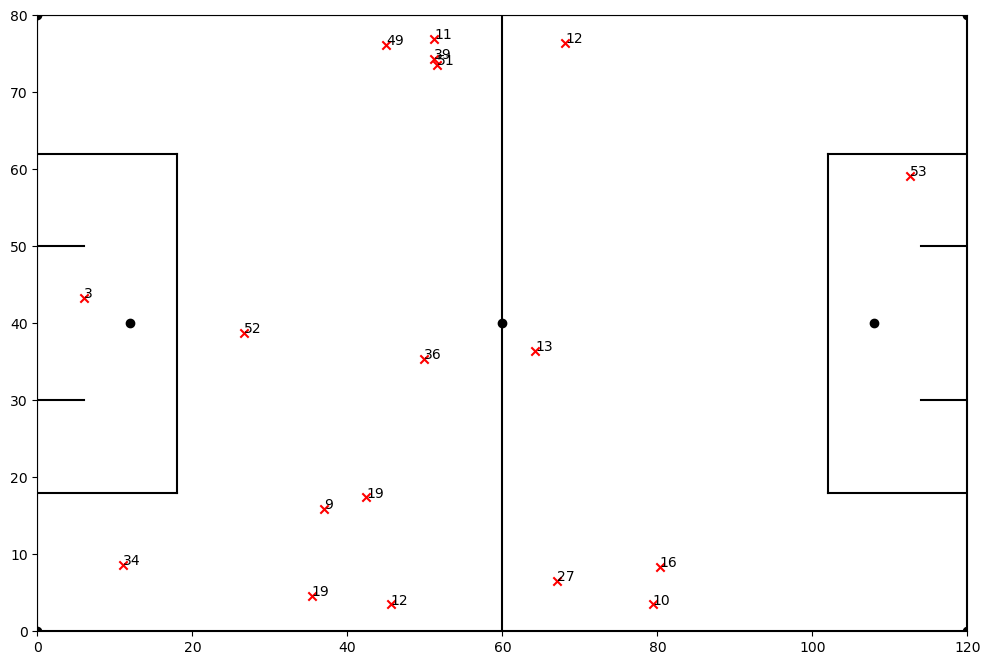

In [228]:
# fais un terrain de foot avec toutes les lignes (surfaces, ...) de 80m x 120m
fig,ax = plt.subplots(figsize=(12,8))
# terrain
ax.plot([0,0],[0,80], color = "black")
ax.plot([0,120],[80,80], color = "black")
ax.plot([120,120],[80,0], color = "black")
ax.plot([120,0],[0,0], color = "black")
# surface de réparation
ax.plot([0,18],[18,18], color = "black")
ax.plot([0,18],[62,62], color = "black")
ax.plot([120,102],[18,18], color = "black")
ax.plot([120,102],[62,62], color = "black")
ax.plot([18,18],[18,62], color = "black")
ax.plot([102,102],[18,62], color = "black")
# petit rectangle
ax.plot([0,6],[30,30], color = "black")
ax.plot([0,6],[50,50], color = "black")
ax.plot([120,114],[30,30], color = "black")
ax.plot([120,114],[50,50], color = "black")

# point central
ax.scatter(60,40, color = "black")
ax.plot([60,60],[80,0], color = "black")

# point de penalty
ax.scatter(12,40, color = "black")
ax.scatter(108,40, color = "black")

# point de corner
ax.scatter(0,0, color = "black")
ax.scatter(120,0, color = "black")
ax.scatter(0,80, color = "black")
ax.scatter(120,80, color = "black")



fouls = events[(events["type.name"]== "Foul Won")& (events["match_date"] == "2022-12-18") & (events["team.name"] == "Argentina")]
fouls_commited = events[(events["type.name"]== "Foul Committed")& (events["match_date"] == "2022-12-18")]
# placer toutes les fautes sur le terrain
ax.set_xlim([0,120])
ax.set_ylim([0,80])

for i in range(len(fouls)):
    x = fouls.iloc[i]["location"][0]
    y = 80 - fouls.iloc[i]["location"][1]
    ax.scatter(x,y, color = "red", marker="x")
    #ax.annotate(fouls.iloc[i]["player.name"], (x,y), color = "red")
    ax.annotate(fouls.iloc[i]["second"], (x,y), color = "black")


In [328]:
# tous les attributs contenant pass
pass_columns = events.columns[events.columns.str.contains("pass")]

for col in range(1,len(pass_columns)):
    if (pass_columns[col] != "pass.recipient.name") & (pass_columns[col] != "pass.end_location") & (pass_columns[col] != "pass.assisted_shot_id") & (pass_columns[col] != "shot.key_pass_id"):
        print(pass_columns[col])
        print(events[pass_columns[col]].unique())


pass.length
[      nan 18.258423 26.826294 ... 73.71411  72.861786 79.32578 ]
pass.angle
[       nan 2.9431229  1.4737241  ... 0.05564901 0.04118549 0.27708754]
pass.height.id
[nan  1.  3.  2.]
pass.height.name
[nan 'Ground Pass' 'High Pass' 'Low Pass']
pass.body_part.id
[ nan  40.  38.  37.  69.  70. 106.  68.]
pass.body_part.name
[nan 'Right Foot' 'Left Foot' 'Head' 'Keeper Arm' 'Other' 'No Touch'
 'Drop Kick']
pass.type.id
[nan 65. 66. 67. 61. 63. 62. 64.]
pass.type.name
[nan 'Kick Off' 'Recovery' 'Throw-in' 'Corner' 'Goal Kick' 'Free Kick'
 'Interception']
pass.cross
[nan True]
pass.outcome.id
[nan  9. 75. 77. 76. 74.]
pass.outcome.name
[nan 'Incomplete' 'Out' 'Unknown' 'Pass Offside' 'Injury Clearance']
pass.shot_assist
[nan True]
pass.deflected
[nan True]
pass.aerial_won
[nan True]
pass.switch
[nan True]
pass.outswinging
[nan True]
pass.technique.id
[ nan 105. 108. 107. 104.]
pass.technique.name
[nan 'Outswinging' 'Through Ball' 'Straight' 'Inswinging']
pass.cut_back
[nan True]
p

In [164]:
events["position.name"].unique()

array([nan, 'Center Forward', 'Right Defensive Midfield', 'Right Back',
       'Right Center Back', 'Center Attacking Midfield', 'Left Wing',
       'Left Center Back', 'Left Defensive Midfield', 'Goalkeeper',
       'Right Wing', 'Right Wing Back', 'Center Back', 'Left Back',
       'Left Wing Back', 'Left Center Forward', 'Right Center Forward',
       'Substitute', 'Right Midfield', 'Center Defensive Midfield',
       'Right Center Midfield', 'Left Midfield', 'Left Center Midfield',
       'Left Attacking Midfield', 'Right Attacking Midfield'],
      dtype=object)

In [313]:
dissposs = eventsfinal[(eventsfinal["type.name"] == "Injury Stoppage") & (eventsfinal["player.name"] == "Damián Emiliano Martínez")]
dissposs

,match_id,competition_season,match_date,match_outcome,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,pass.cross,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,under_pressure,clearance.right_foot,clearance.body_part.id,clearance.body_part.name,shot.statsbomb_xg,shot.end_location,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.first_time,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,pass.assisted_shot_id,pass.shot_assist,shot.key_pass_id,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.outcome.id,goalkeeper.outcome.name,off_camera,pass.deflected,counterpress,duel.type.id,duel.type.name,pass.aerial_won,interception.outcome.id,interception.outcome.name,clearance.left_foot,pass.switch,clearance.aerial_won,clearance.head,out,pass.outswinging,pass.technique.id,pass.technique.name,foul_won.defensive,duel.outcome.id,duel.outcome.name,dribble.outcome.id,dribble.outcome.name,shot.one_on_one,pass.cut_back,block.offensive,foul_committed.card.id,foul_committed.card.name,pass.goal_assist,shot.deflected,block.deflection,pass.through_ball,foul_committed.advantage,foul_won.advantage,pass.miscommunication,ball_recovery.recovery_failure,dribble.nutmeg,shot.open_goal,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_committed.type.id,foul_committed.type.name,injury_stoppage.in_chain,bad_behaviour.card.id,bad_behaviour.card.name,shot.aerial_won,pass.no_touch,miscontrol.aerial_won,dribble.overrun,foul_committed.offensive,50_50.outcome.id,50_50.outcome.name,pass.straight,pass.inswinging,ball_recovery.offensive,clearance.other,foul_committed.penalty,foul_won.penalty,dribble.no_touch,shot.follows_dribble,goalkeeper.punched_out,block.save_block,shot.saved_to_post,goalkeeper.shot_saved_to_post,half_start.late_video_start,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.success_in_play,shot.redirect,goalkeeper.lost_in_play
32708,3869685,FIFA World Cup_2022,2022-12-18,0,e5a4e3e0-5f09-4169-8acc-cba724138019,359,1,00:09:25.483,9,25,19,0.0,40,Injury Stoppage,779,Argentina,2,From Corner,779,Argentina,NaN,NaN,NaN,NaN,6909.0,Damián Emiliano Martínez,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [412]:
events["type.name"].value_counts()

type.name
Pass                 68515
Ball Receipt*        63715
Carry                53764
Pressure             16553
Ball Recovery         5821
Duel                  4389
Clearance             2684
Block                 2386
Dribble               1793
Foul Committed        1775
Miscontrol            1755
Goal Keeper           1749
Foul Won              1693
Shot                  1453
Dispossessed          1431
Interception          1371
Dribbled Past         1036
Substitution           587
Injury Stoppage        403
Half Start             276
Half End               276
Tactical Shift         243
50/50                  236
Referee Ball-Drop      162
Starting XI            128
Shield                 104
Player Off              74
Player On               74
Bad Behaviour           40
Error                   28
Offside                 26
Own Goal Against         3
Own Goal For             3
Name: count, dtype: int64

In [413]:
duels_theo

,match_id,competition_season,match_date,match_outcome,id,index,period,timestamp,minute,second,possession,duration,type.id,type.name,possession_team.id,possession_team.name,play_pattern.id,play_pattern.name,team.id,team.name,tactics.formation,tactics.lineup,related_events,location,player.id,player.name,position.id,position.name,pass.recipient.id,pass.recipient.name,pass.length,pass.angle,pass.height.id,pass.height.name,pass.end_location,pass.body_part.id,pass.body_part.name,pass.type.id,pass.type.name,carry.end_location,pass.cross,pass.outcome.id,pass.outcome.name,ball_receipt.outcome.id,ball_receipt.outcome.name,under_pressure,clearance.right_foot,clearance.body_part.id,clearance.body_part.name,shot.statsbomb_xg,shot.end_location,shot.technique.id,shot.technique.name,shot.body_part.id,shot.body_part.name,shot.type.id,shot.type.name,shot.outcome.id,shot.outcome.name,shot.first_time,shot.freeze_frame,goalkeeper.end_location,goalkeeper.position.id,goalkeeper.position.name,goalkeeper.type.id,goalkeeper.type.name,pass.assisted_shot_id,pass.shot_assist,shot.key_pass_id,goalkeeper.technique.id,goalkeeper.technique.name,goalkeeper.body_part.id,goalkeeper.body_part.name,goalkeeper.outcome.id,goalkeeper.outcome.name,off_camera,pass.deflected,counterpress,duel.type.id,duel.type.name,pass.aerial_won,interception.outcome.id,interception.outcome.name,clearance.left_foot,pass.switch,clearance.aerial_won,clearance.head,out,pass.outswinging,pass.technique.id,pass.technique.name,foul_won.defensive,duel.outcome.id,duel.outcome.name,dribble.outcome.id,dribble.outcome.name,shot.one_on_one,pass.cut_back,block.offensive,foul_committed.card.id,foul_committed.card.name,pass.goal_assist,shot.deflected,block.deflection,pass.through_ball,foul_committed.advantage,foul_won.advantage,pass.miscommunication,ball_recovery.recovery_failure,dribble.nutmeg,shot.open_goal,substitution.outcome.id,substitution.outcome.name,substitution.replacement.id,substitution.replacement.name,foul_committed.type.id,foul_committed.type.name,injury_stoppage.in_chain,bad_behaviour.card.id,bad_behaviour.card.name,shot.aerial_won,pass.no_touch,miscontrol.aerial_won,dribble.overrun,foul_committed.offensive,50_50.outcome.id,50_50.outcome.name,pass.straight,pass.inswinging,ball_recovery.offensive,clearance.other,foul_committed.penalty,foul_won.penalty,dribble.no_touch,shot.follows_dribble,goalkeeper.punched_out,block.save_block,shot.saved_to_post,goalkeeper.shot_saved_to_post,half_start.late_video_start,shot.saved_off_target,goalkeeper.shot_saved_off_target,goalkeeper.success_in_play,shot.redirect,goalkeeper.lost_in_play
32505,3869685,FIFA World Cup_2022,2022-12-18,0,c3c5e08d-cfad-41a3-8cdd-ae359522fff4,156,1,00:04:08.181,4,8,11,0.0,4,Duel,779,Argentina,3,From Free Kick,771,France,NaN,NaN,[13643507-1bd3-46bc-bba0-06beb5e7c5ae],"[11.2, 75.2]",4445.0,Jules Koundé,2.0,Right Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,Tackle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,Lost Out,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32852,3869685,FIFA World Cup_2022,2022-12-18,0,a9d8e5f3-009f-4273-bda0-5cd703daadb7,503,1,00:14:29.944,14,29,24,0.0,4,Duel,771,France,3,From Free Kick,779,Argentina,NaN,NaN,[567b6d1f-24e1-4c07-ae08-e40c83333fca],"[43.5, 15.3]",3090.0,Nicolás Hernán Otamendi,5.0,Left Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Aerial Lost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [409]:
pass_griezmann = events[(events["player.name"] == "Antoine Griezmann") & (events["type.name"] == "Pass") & (events["match_date"] == "2022-12-18")]
pass_griezmann.shape
# pass != nan
#pass_griezmann[pass_griezmann["pass.outcome.name"].notnull()]
pass_griezmann[pass_griezmann["pass.outcome.name"].isnull()].shape
#pass_griezmann[pass_griezmann["pass.outcome.name"].isnull()].shape[0]/pass_griezmann.shape[0]


duels_theo = events[((events["player.name"] == "Jules Koundé") | (events["player.name"] == "Nicolás Hernán Otamendi") ) & (events["type.name"] == "Duel") & (events["match_date"] == "2022-12-18")]
duels_theo[["player.name","minute", "second", "duel.outcome.name", "duel.type.name"]]
eventsfinal[(eventsfinal["minute"] == 122)& (eventsfinal["second"] > 0)][["player.name","type.name","second", "clearance.aerial_won","clearance.body_part.name","pass.outcome.name"]]

# j'aimerais avoir un count des uniques values de "type.name" pour Kylian Mbappé Lottin
print(events[(events["player.name"] == "Kylian Mbappé Lottin")]["type.name"].value_counts())

events[(events["type.name"] == "50/50") ].groupby("player.name").size().sort_values(ascending = False).head(10)


type.name
Ball Receipt*      361
Carry              298
Pass               233
Dribble             50
Pressure            37
Shot                31
Ball Recovery       30
Miscontrol          21
Dispossessed        17
Foul Won            10
Foul Committed       8
Duel                 6
Block                2
Interception         1
Dribbled Past        1
Injury Stoppage      1
Player Off           1
Player On            1
Name: count, dtype: int64


player.name
Rodrigo Javier De Paul             4
Enzo Fernandez                     4
Marcelo Brozović                   4
Mateo Kovačić                      4
Nicolás Alejandro Tagliafico       4
Jurriën David Norman Timber        3
Wataru Endo                        3
Firas Tariq Nasser Al Albirakan    3
Assim Omer Al Haj Madibo           3
Gerson Torres Barrantes            3
dtype: int64

In [337]:
assist_counts = events[events["pass.assisted_shot_id"].notnull()].groupby("player.name").size()
players_with_more_than_two_assists = assist_counts[assist_counts > 10].index.tolist()

players_with_more_than_two_assists

['Antoine Griezmann',
 'Kylian Mbappé Lottin',
 'Lionel Andrés Messi Cuccittini',
 'Ousmane Dembélé',
 'Theo Bernard François Hernández',
 'Ángel Fabián Di María Hernández']

In [167]:
## recuperer le nombre de buts marqués par chaque joueur
# récupérer les buts marqués par chaque joueur
goals = events[events["shot.outcome.name"] == "Goal"].groupby("player.name").size()
# récupérer les joueurs ayant marqué plus de 5 buts
goals.sort_values(ascending=False, inplace=True)
goals


player.name
Kylian Mbappé Lottin                       8
Lionel Andrés Messi Cuccittini             7
Olivier Giroud                             4
Julián Álvarez                             4
Cody Mathès Gakpo                          3
Gonçalo Matias Ramos                       3
Richarlison de Andrade                     3
Bukayo Saka                                3
Enner Remberto Valencia Lastra             3
Álvaro Borja Morata Martín                 3
Marcus Rashford                            3
Kai Havertz                                2
Niclas Füllkrug                            2
Salem Mohammed Al Dawsari                  2
Rafael Alexandre Conceição Leão            2
Harry Kane                                 2
Neymar da Silva Santos Junior              2
Gue-Sung Cho                               2
Mohammed Kudus                             2
Giorgian Daniel De Arrascaeta Benedetti    2
Robert Lewandowski                         2
Ferrán Torres García                       

In [168]:
# pass_griezmann = events[(events["player.name"] == "Antoine Griezmann") & (events["type.name"] == "Pass") & (events["match_date"] == "2022-12-18")]
# pass_griezmann.shape
# # pass != nan
# #pass_griezmann[pass_griezmann["pass.outcome.name"].notnull()]
# pass_griezmann[pass_griezmann["pass.outcome.name"].isnull()].shape
# #pass_griezmann[pass_griezmann["pass.outcome.name"].isnull()].shape[0]/pass_griezmann.shape[0]

def get_passes_before_date(player_name, match_date, events):
    # Récupérer les passes du joueur
    player_passes = events[(events["player.name"] == player_name) & (events["type.name"] == "Pass") & (events["match_date"] < match_date)]
    # Récupérer les passes réussies

    player_successful_passes_percentage = player_passes[player_passes["pass.outcome.name"].isnull()].shape[0]/player_passes.shape[0]

    return player_successful_passes_percentage

In [169]:
goalkeepers = ["Goalkeeper"]
defensive_players = ["Right Center Back", "Left Center Back", "Right Back", "Left Back",'Center Back','Left Defensive Midfield', 'Right Defensive Midfield', "Right Wing Back",'Left Wing Back',]
midfielders = ["Right Midfield", "Left Midfield", "Center Midfield", "Right Center Midfield", "Left Center Midfield"]
offensive_players = ['Center Forward', "Right Wing", "Left Wing", 'Center Attacking Midfield', 'Left Center Forward', 'Right Center Forward','Left Attacking Midfield', 'Right Attacking Midfield']

In [170]:
def extract_player_names(tactics_lineup):
    return [player["player"]["name"] for player in tactics_lineup]
def extract_player_position(tactics_lineup):
    return [player["position"]["name"] for player in tactics_lineup]

(8,)

In [418]:
# Créer le DataFrame initial
startingXI = pd.DataFrame(columns=["match_id", "competition_season", "match_date", "player_1", "player_2", "player_3", "player_4", "player_5", "player_6", "player_7", "player_8", "player_9", "player_10", "player_11", "player_12", "player_13", "player_14", "player_15", "player_16", "player_17", "player_18", "player_19", "player_20", "player_21", "player_22"])

startingXI
lineup.reset_index(drop=True, inplace=True)



In [ ]:


def get_assists_before_date(player_name, match_date, events_df):
    # Filtrer les passes dé du joueur avant la date du match
    player_assists = events_df[(events_df["player.name"] == player_name) &
                             (events_df["type.name"] == "Pass") & (events_df["pass.goal_assist"] == True) &
                             (events_df['match_date'] < match_date)]

    return player_assists.shape[0]



# Créer un dictionnaire pour stocker les buts de chaque joueur avant chaque date de match

player_goals_cache = {}

player_appearances_cache = {}

for match_date in lineup['match_date'].unique():
    lineups_for_date = lineup[lineup["match_date"] == match_date]["tactics.lineup"]
    match_goals = events[(events["shot.outcome.name"] == "Goal") & 
                         (events['match_date'] < match_date)]

    goals_conceded = events[((events["goalkeeper.type.name"] == "Goal Conceded") | (events["goalkeeper.type.name"] == "Penalty Conceded"))
                             &
                            (events['match_date'] < match_date)]

    for tactics_lineup in lineups_for_date:
        # Assurez-vous que tactics_lineup est une liste avant de l'envoyer à la fonction
        if isinstance(tactics_lineup, list):
            player_names = extract_player_names(tactics_lineup)
            player_positions = extract_player_position(tactics_lineup)

            # Créer un mapping de noms de joueurs à leurs positions pour cette date
            player_to_position = dict(zip(player_names, player_positions))

            for player, position in player_to_position.items():
                player_appearances_cache[(player, match_date)] = events[(events["player.name"] == player) & (events['match_date'] < match_date)].groupby('match_id').first().reset_index().shape[0]
                if position == 'Goalkeeper':
                    player_goals_cache[(player, match_date)] = goals_conceded[goals_conceded["player.name"] == player].shape[0]
                else:
                    player_goals_cache[(player, match_date)] = match_goals[match_goals["player.name"] == player].shape[0]


player_assist_cache = {}

for match_date in lineup['match_date'].unique():
    match_assists = events[(events["type.name"] == "Pass") & (events["pass.goal_assist"] == True)]
    for player in match_assists['player.name'].unique():
        player_assist_cache[(player, match_date)] = match_assists[match_assists["player.name"] == player].shape[0]

player_keypass_cache = {}

for match_date in lineup['match_date'].unique():
    match_keypass = events[(events["type.name"] == "Pass") & (events["pass.assisted_shot_id"].notnull())]
    for player in match_keypass['player.name'].unique():
        player_keypass_cache[(player, match_date)] = match_keypass[match_keypass["player.name"] == player].shape[0]





In [419]:
for i in range(0, len(lineup), 2):
    # Extraire les informations pour les deux équipes
    team1_lineup = lineup["tactics.lineup"][i]
    team2_lineup = lineup["tactics.lineup"][i + 1]


    # Vérifier que chaque équipe a 11 joueurs
    if len(team1_lineup) < 11 or len(team2_lineup) < 11:
        continue  # ou gérer l'erreur comme vous le souhaitez

    player_names = extract_player_names(team1_lineup) + extract_player_names(team2_lineup)
    player_positions = extract_player_position(team1_lineup) + extract_player_position(team2_lineup)
    lineup_data = {
        "match_id": lineup["match_id"][i], 
        "competition_season": lineup["competition_season"][i], 
        "match_date": lineup["match_date"][i],
        **{f"player_{j+1}": player_names[j] for j in range(22)},
        **{f"player_{j+1}_position": player_positions[j] for j in range(22)},
        **{
            f"player_{j+1}_goals": (
                player_goals_cache.get((player_names[j], lineup["match_date"][i]), 0) / 
                player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1)
                if player_appearances_cache.get((player_names[j], lineup["match_date"][i]), 1) != 0 else 0
            ) for j in range(22)
            },
        **{f"player_{j+1}_assists": player_assist_cache.get((player_names[j], lineup["match_date"][i]), 0) for j in range(22)},
        **{f"player_{j+1}_keypass": player_keypass_cache.get((player_names[j], lineup["match_date"][i]), 0) for j in range(22)}
    }

    Newlineup = pd.DataFrame([lineup_data])
    startingXI = pd.concat([startingXI, Newlineup], ignore_index=True)

In [389]:
events[(events["shot.outcome.name"] == "Goal")].shape[0]

169

In [420]:
startingXI[startingXI["match_date"] > "2022-12-12"]

,match_id,competition_season,match_date,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9,player_10,player_11,player_12,player_13,player_14,player_15,player_16,player_17,player_18,player_19,player_20,player_21,player_22,player_1_position,player_2_position,player_3_position,player_4_position,player_5_position,player_6_position,player_7_position,player_8_position,player_9_position,player_10_position,player_11_position,player_12_position,player_13_position,player_14_position,player_15_position,player_16_position,player_17_position,player_18_position,player_19_position,player_20_position,player_21_position,player_22_position,player_1_goals,player_2_goals,player_3_goals,player_4_goals,player_5_goals,player_6_goals,player_7_goals,player_8_goals,player_9_goals,player_10_goals,player_11_goals,player_12_goals,player_13_goals,player_14_goals,player_15_goals,player_16_goals,player_17_goals,player_18_goals,player_19_goals,player_20_goals,player_21_goals,player_22_goals,player_1_assists,player_2_assists,player_3_assists,player_4_assists,player_5_assists,player_6_assists,player_7_assists,player_8_assists,player_9_assists,player_10_assists,player_11_assists,player_12_assists,player_13_assists,player_14_assists,player_15_assists,player_16_assists,player_17_assists,player_18_assists,player_19_assists,player_20_assists,player_21_assists,player_22_assists,player_1_keypass,player_2_keypass,player_3_keypass,player_4_keypass,player_5_keypass,player_6_keypass,player_7_keypass,player_8_keypass,player_9_keypass,player_10_keypass,player_11_keypass,player_12_keypass,player_13_keypass,player_14_keypass,player_15_keypass,player_16_keypass,player_17_keypass,player_18_keypass,player_19_keypass,player_20_keypass,player_21_keypass,player_22_keypass
9,3869685,FIFA World Cup_2022,2022-12-18,Damián Emiliano Martínez,Nahuel Molina Lucero,Cristian Gabriel Romero,Nicolás Hernán Otamendi,Nicolás Alejandro Tagliafico,Enzo Fernandez,Rodrigo Javier De Paul,Alexis Mac Allister,Lionel Andrés Messi Cuccittini,Ángel Fabián Di María Hernández,Julián Álvarez,Hugo Lloris,Jules Koundé,Raphaël Varane,Dayotchanculle Upamecano,Theo Bernard François Hernández,Aurélien Djani Tchouaméni,Adrien Rabiot,Ousmane Dembélé,Antoine Griezmann,Kylian Mbappé Lottin,Olivier Giroud,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Center Defensive Midfield,Right Center Midfield,Left Center Midfield,Right Wing,Left Wing,Center Forward,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Right Defensive Midfield,Left Defensive Midfield,Right Wing,Center Attacking Midfield,Left Wing,Center Forward,0.666667,0.166667,0.0,0.0,0.000000,0.166667,0.0,0.200000,0.833333,0.0,0.666667,0.8,0.0,0.0,0.0,0.2,0.166667,0.2,0.0,0.000000,0.833333,0.800000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,3.0,2.0,0.0,0.0,3.0,0.0,2.0,2.0,6.0,7.0,8.0,19.0,11.0,2.0,0.0,2.0,0.0,1.0,12.0,6.0,2.0,12.0,20.0,11.0,2.0
18,3869684,FIFA World Cup_2022,2022-12-17,Dominik Livaković,Josip Stanišić,Josip Šutalo,Joško Gvardiol,Ivan Perišić,Luka Modrić,Mateo Kovačić,Lovro Majer,Andrej Kramarić,Mislav Oršić,Marko Livaja,Yassine Bounou,Achraf Hakimi Mouh,Jawad El Yamiq,Achraf Dari,Yahia Attiyat allah,Sofyan Amrabat,Bilal El Khannous,Abdelhamid Sabiri,Hakim Ziyech,Sofiane Boufal,Youssef En-Nesyri,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Right Defensive Midfield,Left Defensive Midfield,Right Wing,Center Attacking Midfield,Left Wing,Center Forward,Goalkeeper,Right Back,Right Center Back,Left Center Back,Left Back,Center Defensive Midfield,Right Center Midfield,Left Center Midfield,Right Wing,Left Wing,Center Forward,1.000000,0.000000,0.0,0.0,0.166667,0.000000,0.0,0.166667,0.333333,0.0,0.200000,0.4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.166667,0.000000,0.333333,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,6.0,9.0,1.0,5.0,5.0,2.0,0.0,7.0,0.0,0.0,4.0,2.0,0.0,3.0,7.0,4.0,1.